In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("btc_6h.csv")
# Assuming 'df' is your DataFrame with datetime as index and 'close' as closing prices
window_size = 20  # Choose an appropriate window size

# Calculate rolling mean and standard deviation
df['rolling_mean'] = df['close'].rolling(window=window_size).mean()
df['rolling_std'] = df['close'].rolling(window=window_size).std()


In [2]:
# Choose an appropriate threshold for mean deviation
threshold = 1.0  # Adjust as needed

# Generate signals
df['buy_signal'] = df['close'] < (df['rolling_mean'] - threshold * df['rolling_std'])
df['sell_signal'] = df['close'] > (df['rolling_mean'] + threshold * df['rolling_std'])
df


,datetime,open,high,low,close,volume,rolling_mean,rolling_std,buy_signal,sell_signal
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13558.99,2421.241182,NaN,NaN,False,False
1,2018-01-01 11:30:00,13539.00,13818.55,13001.13,13220.56,1876.934392,NaN,NaN,False,False
2,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13022.00,2427.898747,NaN,NaN,False,False
3,2018-01-01 23:30:00,13007.87,13599.70,12940.00,13380.00,1883.841523,NaN,NaN,False,False
4,2018-01-02 05:30:00,13382.16,13850.00,12890.02,13166.95,3957.954564,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
5954,2022-01-30 05:30:00,38166.83,38300.00,37737.49,38139.39,4656.397760,37240.6265,670.056941,False,True
5955,2022-01-30 11:30:00,38139.38,38359.26,37795.00,38110.02,6113.435610,37325.8275,666.673171,False,True
5956,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37991.00,4075.221880,37361.7110,682.817506,False,False
5957,2022-01-30 23:30:00,37991.00,38230.00,37351.63,37881.76,6585.610020,37407.8830,685.321468,False,False


In [3]:
capital = 10000  # Initial capital in USDT
position = 0     # Initial position (0 for no position, 1 for long, -1 for short)

# Transaction costs and slippage
transaction_cost_rate = 0.0015  # 0.15% per transaction
slippage_rate = 0.001  # 0.1% slippage per transaction

# Risk management parameters
risk_per_trade = 0.02  # Risk 2% of capital per trade
max_drawdown_limit = 0.05  # Maximum allowable drawdown

# Backtesting loop
for i in range(window_size, len(df)):
    if df['buy_signal'][i]:
        # Buy signal
        if position <= 0:
            # Calculate position size based on risk per trade
            risk_per_trade_amount = capital * risk_per_trade
            stop_loss_price = df['close'][i] - df['rolling_std'][i]  # Adjust as needed
            position_size = risk_per_trade_amount / (df['close'][i] - stop_loss_price)

            # Check if position size exceeds the maximum allowable drawdown
            if position_size * (df['close'][i] - stop_loss_price) > capital * max_drawdown_limit:
                position_size = capital * max_drawdown_limit / (df['close'][i] - stop_loss_price)

            # Execute buy order
            capital -= position_size * df['close'][i] * (1 + slippage_rate)
            position += position_size

    elif df['sell_signal'][i]:
        # Sell signal
        if position >= 0:
            # Execute sell order
            capital += position * df['close'][i] * (1 - slippage_rate)
            position = 0

# Calculate final capital including the last position
final_capital = capital + position * df['close'].iloc[-1]

# Print the final capital
print("Final Capital: {:.2f} USDT".format(final_capital))

Final Capital: -35695.18 USDT


In [4]:
capital = 10000  # Initial capital in USDT
position = 0     # Initial position (0 for no position, 1 for long, -1 for short)

# Transaction costs and slippage
transaction_cost_rate = 0.0015  # 0.15% per transaction
slippage_rate = 0.001  # 0.1% slippage per transaction

# Backtesting loop
for i in range(window_size, len(df)):
    if df['buy_signal'][i]:
        # Buy signal
        if position <= 0:
            # Execute buy order
            capital -= df['close'][i] * (1 + slippage_rate)
            position += 1

    elif df['sell_signal'][i]:
        # Sell signal
        if position >= 0:
            # Execute sell order
            capital += df['close'][i] * (1 - slippage_rate)
            position -= 1

# Calculate final capital including the last position
final_capital = capital + position * df['close'].iloc[-1]

# Print the final capital
print("Final Capital: {:.2f} USDT".format(final_capital))

Final Capital: -35538.57 USDT


In [5]:
capital = 10000  # Initial capital in USDT
position = 0     # Initial position (0 for no position, 1 for long, -1 for short)

# Transaction costs and slippage
transaction_cost_rate = 0.0015  # 0.15% per transaction
slippage_rate = 0.001  # 0.1% slippage per transaction

# Backtesting loop
for i in range(window_size, len(df)):
    if df['buy_signal'][i]:
        # Buy signal
        if position <= 0:
            # Execute buy order
            capital -= df['close'][i] * (1 + slippage_rate)
            capital -= df['close'][i] * transaction_cost_rate
            position += 1

    elif df['sell_signal'][i]:
        # Sell signal
        if position >= 0:
            # Execute sell order
            capital += df['close'][i] * (1 - slippage_rate)
            capital -= df['close'][i] * transaction_cost_rate
            position -= 1

# Calculate final capital including the last position
final_capital = capital + position * df['close'].iloc[-1]

# Print the final capital
print("Final Capital: {:.2f} USDT".format(final_capital))

Final Capital: -48027.62 USDT


In [6]:
initial_capital = 100000  # Starting capital
position = 0  # Initial position
df['position'] = 0  # Create a column to track position

# Iterate through the DataFrame
for index, row in df.iterrows():
    if row['buy_signal']:
        # Buy at the closing price
        position += initial_capital / row['close']
        df.at[index, 'position'] = position
    elif row['sell_signal']:
        # Sell at the closing price
        initial_capital += position * row['close']
        position = 0
        df.at[index, 'position'] = position

# Calculate final profit
final_value = initial_capital + position * df['close'].iloc[-1]
print(final_value)


9.596038103945853e+125


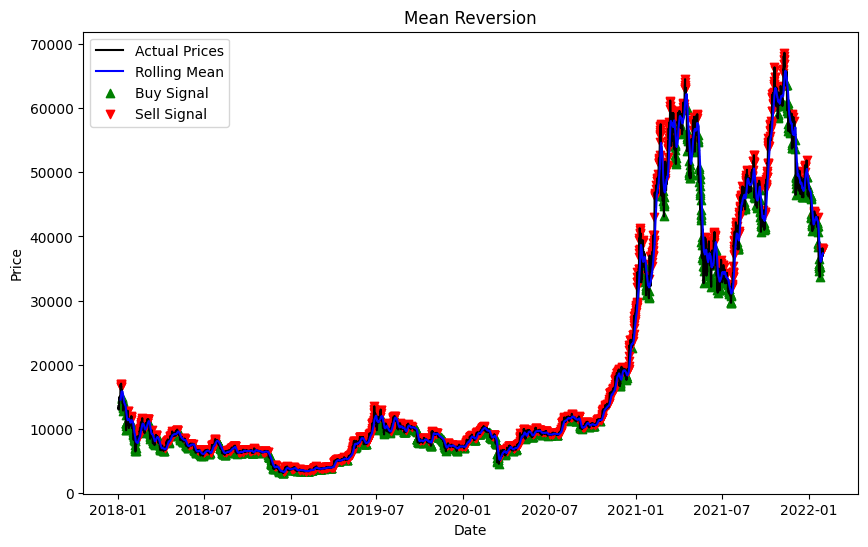

In [11]:
# Plot actual prices, rolling mean, and buy/sell signals
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Actual Prices', color='black')
plt.plot(df['rolling_mean'], label='Rolling Mean', color='blue')
plt.scatter(df.index[df['buy_signal']], df['close'][df['buy_signal']], label='Buy Signal', marker='^', color='green')
plt.scatter(df.index[df['sell_signal']], df['close'][df['sell_signal']], label='Sell Signal', marker='v', color='red')
plt.legend()
plt.title('Mean Reversion')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


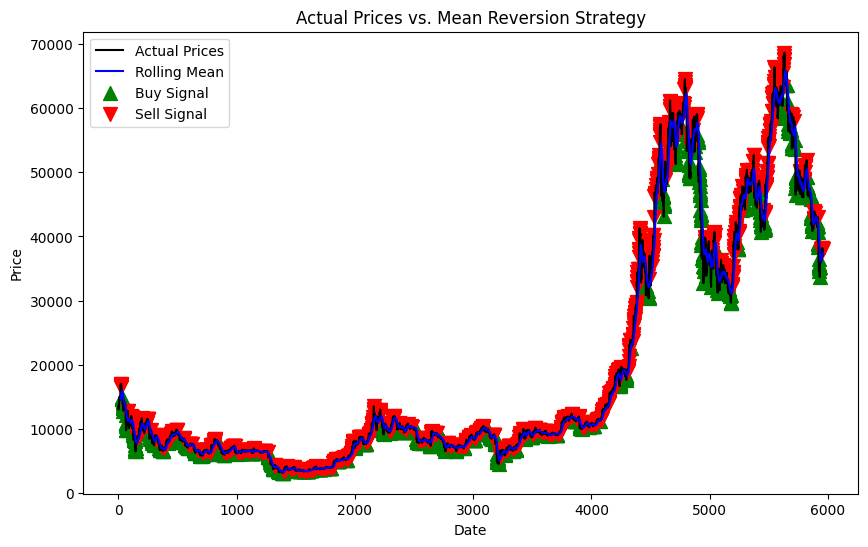

In [8]:
# Plot actual prices, rolling mean, and buy/sell signals
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Actual Prices', color='black')
plt.plot(df['rolling_mean'], label='Rolling Mean', color='blue')
plt.scatter(df.index[df['buy_signal']], df['close'][df['buy_signal']], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(df.index[df['sell_signal']], df['close'][df['sell_signal']], label='Sell Signal', marker='v', color='red', s=100)
plt.legend()
plt.title('Actual Prices vs. Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


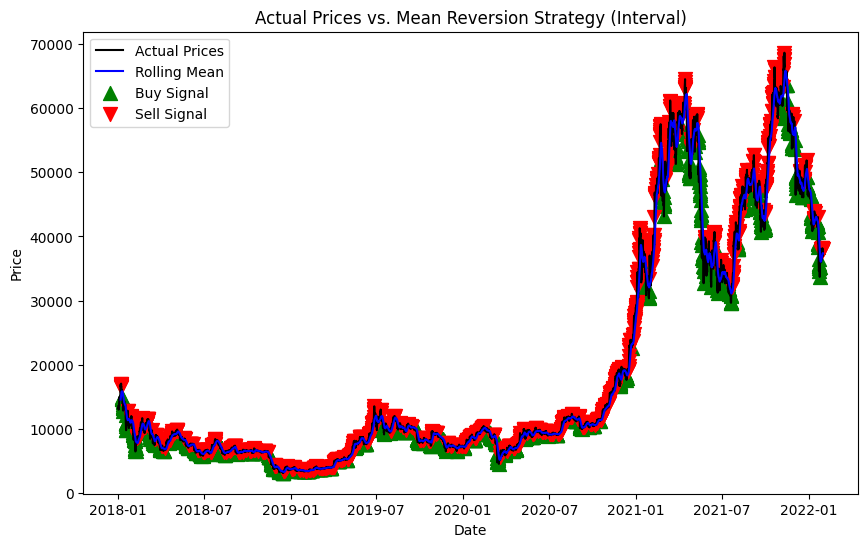

In [9]:
# Specify the start and end dates for the interval
start_date = '2018-01-01'
end_date = '2022-04-30'
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))
# Convert 'datetime' column to datetime type if not already done
#df['datetime'] = pd.to_datetime(df['datetime'])

# Filter DataFrame for the specified interval
df_interval = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Plot actual prices, rolling mean, and buy/sell signals for the interval
plt.figure(figsize=(10, 6))
plt.plot(df_interval['close'], label='Actual Prices', color='black')
plt.plot(df_interval['rolling_mean'], label='Rolling Mean', color='blue')
plt.scatter(df_interval.index[df_interval['buy_signal']], df_interval['close'][df_interval['buy_signal']],
            label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(df_interval.index[df_interval['sell_signal']], df_interval['close'][df_interval['sell_signal']],
            label='Sell Signal', marker='v', color='red', s=100)
plt.legend()
plt.title('Actual Prices vs. Mean Reversion Strategy (Interval)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
